Today Tom met Josh. Josh and Tom shook hands.


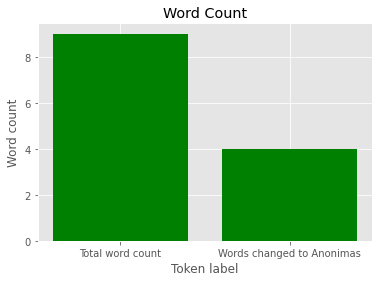

In [3]:
# Reikiamų bibliotekų importavimas
import spacy
import re
from matplotlib import pyplot as plt
from spacy import displacy
from spacy.tokens import Span
nlp = spacy.load('en_core_web_sm')

## Testiniai tekstai
#tekstas = "Today Tom met Josh. Josh and Tom shook hands."
#tekstas = "They just moved to London."
#tekstas = "Susan, Steve and Jake played football"
#tekstas = "William is from Berlin, Germany"
#tekstas = "Johnny lives in Vilnius. He goes to The University of Vilnius together with his friend Greg."
#tekstas = "Jerome is an American. He was born in March 12, 1984"

print(tekstas)

rem_punct = re.sub('[^A-Za-z0-9]+', ' ', tekstas)
All_words = len(nlp(rem_punct))
anonimas_count = 0
doc = nlp(tekstas)

## Vardų pakeitimas žodžiu ANONIMAS
result = []

for t in doc:
    if t.ent_type_ == "PERSON":
        result.append("ANONIMAS")
        anonimas_count+=1
    else:
        result.append(t.text)
    result.append(t.whitespace_)

res = ''.join(result)
doc2 = nlp(res)
## Žodžio ANONIMAS pridėjimas prie PERSON sąrašo 
PERSON = doc2.vocab.strings[u'PERSON']
count = 0
for t in doc2:
    if t.text == "ANONIMAS":
        new_ent = Span(doc2, count, count+1, label = PERSON)
        doc2.ents = list(doc2.ents) + [new_ent]

    count += 1

## Vizualizacija
displacy.render(doc2, style = 'ent', jupyter = True)

%matplotlib inline
plt.style.use('ggplot')

x = ['Total word count', 'Words changed to Anonimas']
energy = [All_words, anonimas_count]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Token label")
plt.ylabel("Word count")
plt.title("Word Count")

plt.xticks(x_pos, x)

plt.show()